# Process Identification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import *
import package_LAB
from package_LAB import *
from importlib import reload
package_LAB = reload(package_LAB) # reload at each run the newset version of your package

## Params of P(s)
Process parameters found using various methods listed bellow

In [2]:
# Process simulation parameters that are reusable multiplke times
TSim = 700
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 500 :0, TSim: 0}

#### BROIDA SIMLPE GRAPH METHOD

In [3]:
t = []
MV = []

# Parameters
Kp = 0.533
T = 151
theta = 17

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV1 = FOPDT(MV,Kp,T,theta,Ts)

#### BROIDA SECOND METHOD

In [4]:
t = []
MV = []

# Parameters
Kp = 0.533
T = 104.5
theta = 24.8

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV2 = FOPDT(MV,Kp,T,theta,Ts)

#### VAN DER GRINTEN METHOD

In [5]:
t = []
MV = []

# Parameters
Kp = 0.533
theta = 14
T1 = 9.38
T2 = 70.81

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)

PV3 = SOPDT(MV,Kp,T1,T2,theta,Ts)

#### SREJC METHOD

In [6]:
t = []
MV = []

# Parameters
Kp = 0.533
T1 = 55.5147
T2 = 55.5147
theta = 1.9

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV4 = SOPDT(MV,Kp,T1,T2,theta,Ts)

#### FOPDT IDENTIFICATION (AUTO PY CODE)

In [7]:
t = []
MV = []

# Parameters
Kp = 0.6890796420174794
T = 195.93418960703713
theta = 6.661942351380765

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV5 = FOPDT(MV,Kp,T,theta,Ts)

#### SOPDT IDENTIFICATION (AUTO PY CODE)

In [8]:
t = []
MV = []

# Parameters
Kp = 0.6738137025155853
T1 = 183.44770757727215
T2 = 5.327855225788805e-05
theta = 10.192078303908199

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV6 = SOPDT(MV,Kp,T1,T2,theta,Ts)

## Plots
Compare the results

(0.0, 700.0)

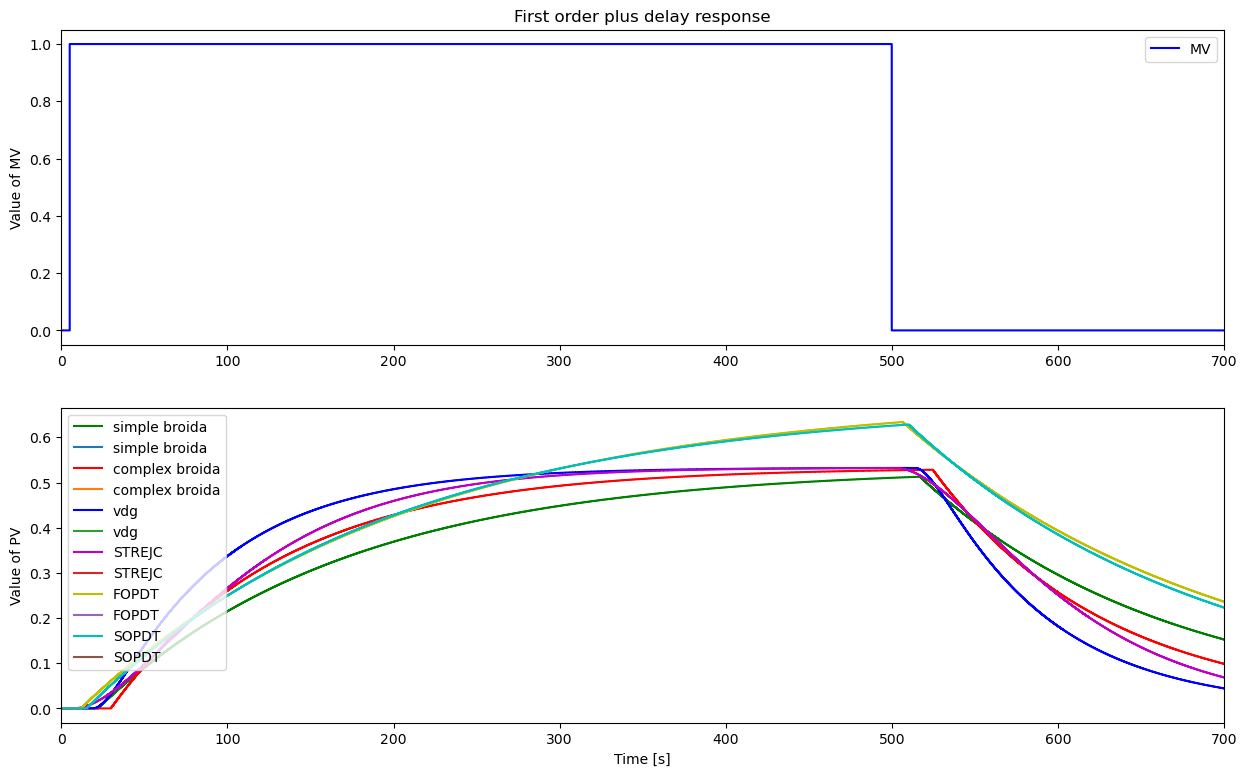

In [9]:
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

linewidth = 0.5
plt.subplot(2,1,2)
plt.step(t, PV1, 'g-', linewidth, label='simple broida', where='post')
plt.step(t, PV2, 'r-', linewidth, label='complex broida', where='post')
plt.step(t, PV3, 'b-', linewidth, label='vdg', where='post')
plt.step(t, PV4, 'm-', linewidth, label='STREJC', where='post')
plt.step(t, PV5, 'y-', linewidth, label='FOPDT', where='post')
plt.step(t, PV6, 'c-', linewidth, label='SOPDT', where='post')

plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

## Bode Diags

##### Process params

In [10]:
#Frequency response

# Broida 1
P1 = Process({})
P1.parameters['Kp'] = Kp_P1 = 0.533
P1.parameters['Tlag1'] = T1_P1 = 151
P1.parameters['theta'] = theta_P1 = 17

# Broida 2
P2 = Process({})
P2.parameters['Kp'] = 0.533
P2.parameters['Tlag1'] = 146.0
P2.parameters['theta'] = 17

# Van Der Grinten
P3 = Process({})
P3.parameters['Kp'] = Kp_P3 = 0.533
P3.parameters['Tlag1'] = T1_P3 = 9.38
P3.parameters['Tlag2'] = T2_P3 = 70.81
P3.parameters['theta'] = theta_P3 = 14

# Strejc
P4 = Process({})
P4.parameters['Kp'] = Kp_P4 = 0.533
P4.parameters['Tlag1'] = T1_P4 = 55.5147
P4.parameters['Tlag2'] = T2_P4 = 55.5147
P4.parameters['theta'] = theta_P4 = 1.9

# Auto FOPDT
P5 = Process({})
P5.parameters['Kp'] = Kp_P5 = 0.6890796420174794
P5.parameters['Tlag1'] = T1_P5 = 195.93418960703713
P5.parameters['theta'] = theta_P5 = 6.661942351380765

# Auto SOPDT
P6 = Process({})
P6.parameters['Kp'] = Kp_P6 = 0.6738137025155853
P6.parameters['Tlag1'] = T1_P6 = 183.44770757727215
P6.parameters['Tlag2'] = T2_P6 = 5.327855225788805e-05
P6.parameters['theta'] = theta_P6 = 10.192078303908199

#### Plot

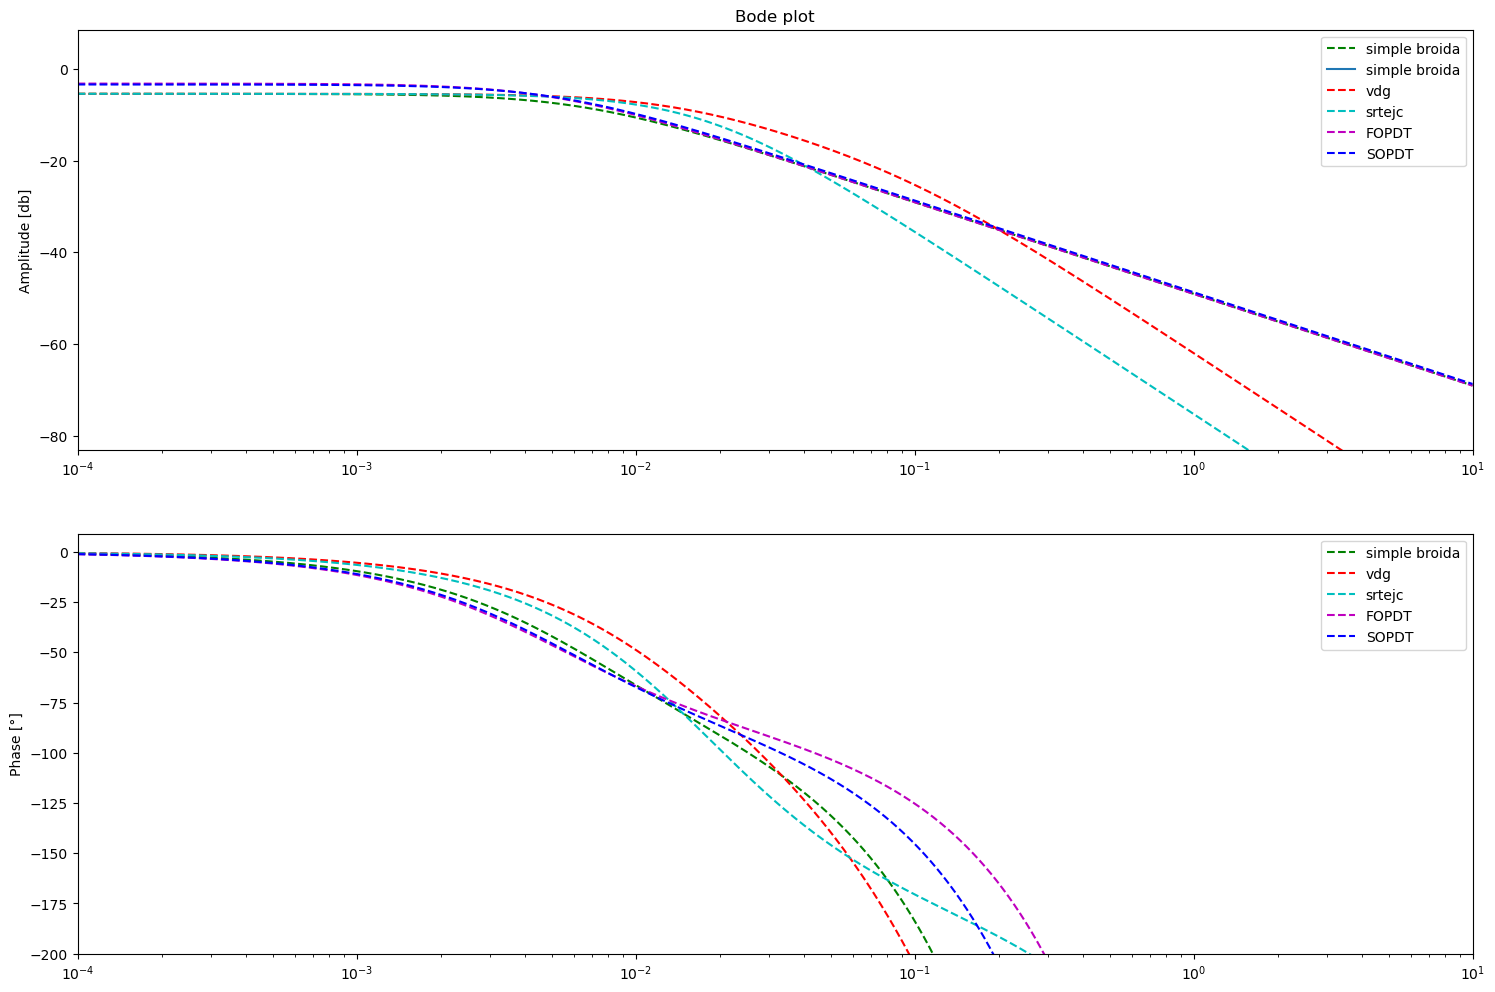

In [11]:
omega = np.logspace(-4, 1, 10000)

Ps1 = Bode(P1,omega,Show=False) # Broida 1
Ps2 = Bode(P2,omega,Show=False) # Broida 2
Ps3 = Bode(P3,omega,Show=False) # Vand Der Grinten
Ps4 = Bode(P4,omega,Show=False) # Strejc
Ps5 = Bode(P5,omega,Show=False) # Auto FOPDT
Ps6 = Bode(P6,omega,Show=False) # Auto SOPDT
plt.figure(figsize = (18,12))

# Gain
plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps1)/5))
gain_max = np.max(20*np.log10(np.abs(Ps1)*5))
plt.semilogx(omega, 20*np.log10(np.abs(Ps1)), 'g--', linewidth, label='simple broida')
# Line issue!!
#plt.semilogx(omega, 20*np.log10(np.abs(Ps2)), 'p--', linewidth, label='complex broida')
plt.semilogx(omega, 20*np.log10(np.abs(Ps3)), 'r--', label='vdg')
plt.semilogx(omega, 20*np.log10(np.abs(Ps4)), 'c--', label='srtejc')
plt.semilogx(omega, 20*np.log10(np.abs(Ps5)), 'm--', label='FOPDT')
plt.semilogx(omega, 20*np.log10(np.abs(Ps6)), 'b--', label='SOPDT')

plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('Bode plot')
plt.legend(loc='best')

# Phase
plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps2))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps2))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps1)), 'g--', label='simple broida')
# Line width issue !!!
#plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps2)), 'p--', linewidth, label='complex broida')
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps3)), 'r--', label='vdg')
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps4)), 'c--', label='srtejc')
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps5)), 'm--', label='FOPDT')
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps6)), 'b--', label='SOPDT')

plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')
plt.legend(loc='best')